# ------------------------------ VOICE GENDER CLASSIFICATION ------------------------------

# 1) Import Libraries and Data

In [28]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# importing data
data = pd.read_csv('voice.csv');
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# 2) Exploratory Data Analysis

In [6]:
# checking data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


In [8]:
# checikng data descriptions
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [10]:
# whole data descriptions
listItem = []
for col in data.columns :
    listItem.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col])) * 100,2),
                    data[col].nunique(), list(data[col].drop_duplicates().sample(2).values)]);

desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'null%', 'n-unique', 'uniqueSample'],
                     data=listItem)
desc

,dataFeatures,dataType,null,null%,n-unique,uniqueSample
0,meanfreq,float64,0,0.0,3166,"[0.170309359988546, 0.19312076929118302]"
1,sd,float64,0,0.0,3166,"[0.0615830082241461, 0.0623593329876597]"
2,median,float64,0,0.0,3077,"[0.10280926564810303, 0.214625550660793]"
3,Q25,float64,0,0.0,3103,"[0.1816, 0.102635914332784]"
4,Q75,float64,0,0.0,3034,"[0.167726638772664, 0.22028941355673998]"
5,IQR,float64,0,0.0,3073,"[0.0165867418899859, 0.12490196078431401]"
6,skew,float64,0,0.0,3166,"[3.2843125398666095, 1.57263201396597]"
7,kurt,float64,0,0.0,3166,"[4.267881148341971, 14.229842733543599]"
8,sp.ent,float64,0,0.0,3166,"[0.8962687707595841, 0.8527524869854809]"
9,sfm,float64,0,0.0,3166,"[0.140094700706525, 0.24927060427048803]"


In [11]:
# target feature
data['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [14]:
# relabeling target feature
from sklearn.preprocessing import LabelEncoder
labeler = LabelEncoder()
mydata = data.copy()
mydata['label'] = labeler.fit_transform(mydata['label'])
mydata['label'].value_counts()

1    1584
0    1584
Name: label, dtype: int64

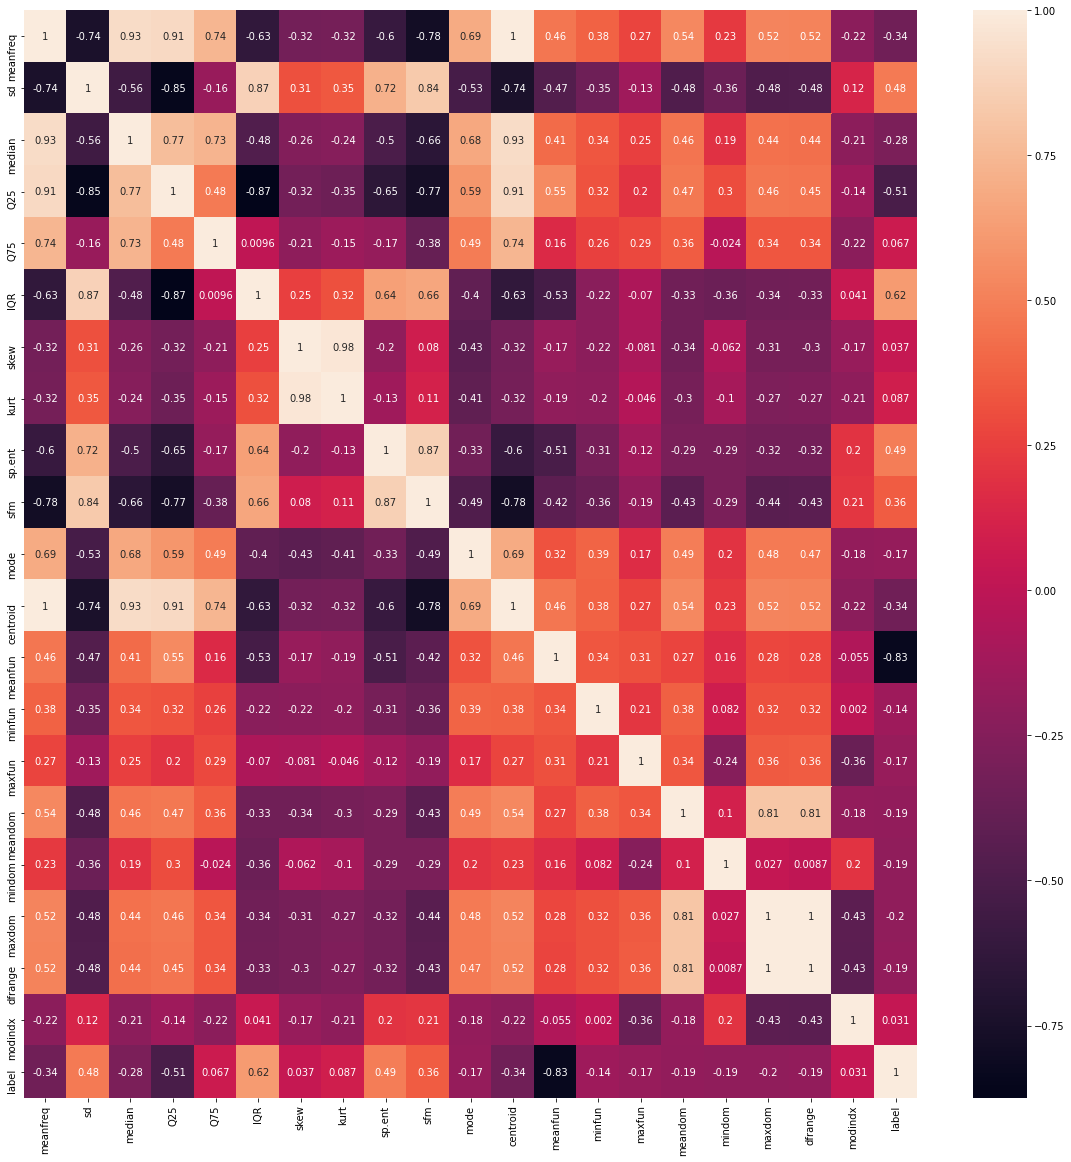

In [15]:
# pearson correlation towards our target feature
plt.figure(figsize=(20,20))
sns.heatmap(mydata.corr(method='pearson'), annot=True)

In [77]:
# defining correlation ratio function to see the association between numerical-categorical features
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat==i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

# correlation ratio, shapiro, skewness & kurtosis value for the numerical features towards our target feature
from scipy.stats import shapiro, skew, kurtosis
for i in data.drop('label',axis = 1).select_dtypes(exclude = 'object').columns:
    print(i)
    print('Correlation Ratio: {}'.format(correlation_ratio(data['label'], data[i])))
    if shapiro(data[i])[1] < 0.05:
        print('Non-Normal Distribution')
    else:
        print('Normal Distribution')
        
    print('Skewness: {}, Kurtosis {}'.format(skew(data[i]), kurtosis(data[i])))
    print('\n')

meanfreq
Correlation Ratio: 0.33741454588785846
Non-Normal Distribution
Skewness: -0.6172028589017363, Kurtosis 0.8019969916276763


sd
Correlation Ratio: 0.4795388400505929
Non-Normal Distribution
Skewness: 0.13685148155541915, Kurtosis -0.522859123324495


median
Correlation Ratio: 0.28391926677289897
Non-Normal Distribution
Skewness: -1.012305061530383, Kurtosis 1.6250369092875276


Q25
Correlation Ratio: 0.5114550479277907
Non-Normal Distribution
Skewness: -0.4906442316783116, Kurtosis 0.016411281349978157


Q75
Correlation Ratio: 0.06690607682831774
Non-Normal Distribution
Skewness: -0.8998844751640044, Kurtosis 2.9752128986673956


IQR
Correlation Ratio: 0.6189155533391113
Non-Normal Distribution
Skewness: 0.2952924547011974, Kurtosis -0.4493466285779939


skew
Correlation Ratio: 0.036626861158681454
Non-Normal Distribution
Skewness: 4.930978027710777, Kurtosis 25.321539991968304


kurt
Correlation Ratio: 0.08719491955865576
Non-Normal Distribution
Skewness: 5.869805488096882, Ku

In [78]:
# A/B testing for categorical-continuous(non-normal distribution) columns
from scipy.stats import mannwhitneyu
mann = []
for i in data.drop('label', axis=1).select_dtypes('number').columns:
    if mannwhitneyu(data[data['label'] == 0][i], 
                    data[data['label'] == 1][i])[1] < 0.05:
        mann.append('Accept H1')
    else:
        mann.append('Accept H0')

res = pd.DataFrame(data = [list(data.drop('label', axis=1).select_dtypes('number').columns), mann]).T
res.columns = ['Columns', 'Hypothesis']
res

,Columns,Hypothesis
0,meanfreq,Accept H1
1,sd,Accept H1
2,median,Accept H1
3,Q25,Accept H1
4,Q75,Accept H1
5,IQR,Accept H1
6,skew,Accept H1
7,kurt,Accept H1
8,sp.ent,Accept H1
9,sfm,Accept H1


In terms of Pearson Correlation & Correlation Ratio, we can see that:
- Features such as meanfreq, sd, sp.ent, sfm, and centroid has moderate association towards voice gender classification
- Features such as Q25, IQR, and meanfun has strong association towards voice gender classification
- Other features has weak association towards voice gender classification


In terms of Shapiro value, we can see that:
- All of the features has a non-normal data distribution, therefore, the use of Mann Whitney U Test is preferable for our data


In terms of Mann Whitney U Test, we can see that:
- All of the features has significant differences in its data distribution with gender label as its category. It could also be said that, in each feature, there's an unequal probability that a randomly drawn observation from one gender label is larger/smaller than a randomly drawn observation from the other label.

In [25]:
# groupby description by gender
pd.set_option('max_rows', None)
data.groupby('label').describe().T

label                female         male
meanfreq count  1584.000000  1584.000000
         mean      0.191000     0.170813
         std       0.029960     0.026254
         min       0.078847     0.039363
         25%       0.177031     0.155625
         50%       0.192732     0.176343
         75%       0.211981     0.190593
         max       0.251124     0.225582
sd       count  1584.000000  1584.000000
         mean      0.049142     0.065110
         std       0.018380     0.009455
         min       0.018363     0.041747
         25%       0.034977     0.058957
         50%       0.041965     0.061781
         75%       0.060452     0.070915
         max       0.115273     0.096030
median   count  1584.000000  1584.000000
         mean      0.195942     0.175299
         std       0.032149     0.037392
         min       0.035114     0.010975
         25%       0.181021     0.149952
         50%       0.198226     0.180612
         75%       0.216214     0.202362
         max       0.261224     0.248840
Q25      count  1584.000000  1584.000000
         mean      0.165349     0.115562
         std       0.049767     0.031999
         min       0.000229     0.000240
         25%       0.157892     0.101205
         50%       0.175373     0.122315
         75%       0.195243     0.136044
         max       0.247347     0.226740
Q75      count  1584.000000  1584.000000
         mean      0.223184     0.226346
         std       0.023121     0.024050
         min       0.127637     0.042946
         25%       0.206280     0.211918
         50%       0.223744     0.228117
         75%       0.241486     0.244819
         max       0.273469     0.268924
IQR      count  1584.000000  1584.000000
         mean      0.057834     0.110784
         std       0.042924     0.020415
         min       0.014558     0.021841
         25%       0.031106     0.100960
         50%       0.042689     0.109940
         75%       0.061268     0.119331
         max       0.252225     0.196168
skew     count  1584.000000  1584.000000
         mean      2.984875     3.295460
         std       3.091454     5.135190
         min       0.141735     0.326033
         25%       1.962717     1.461931
         50%       2.435808     1.880420
         75%       3.086396     2.645467
         max      34.725453    34.537488
kurt     count  1584.000000  1584.000000
         mean     24.805224    48.331698
         std      97.669114   163.115940
         min       2.209673     2.068455
         25%       6.764500     5.003020
         50%       9.607635     6.970088
         75%      14.448639    12.282596
         max    1309.612887  1271.353628
sp.ent   count  1584.000000  1584.000000
         mean      0.873066     0.917188
         std       0.047288     0.028938
         min       0.738651     0.786650
         25%       0.839784     0.899557
         50%       0.865861     0.917309
         75%       0.908557     0.936048
         max       0.978482     0.981997
sfm      count  1584.000000  1584.000000
         mean      0.344763     0.471670
         std       0.179854     0.150473
         min       0.036876     0.080963
         25%       0.208125     0.363316
         50%       0.277228     0.461636
         75%       0.478122     0.576902
         max       0.842936     0.831347
mode     count  1584.000000  1584.000000
         mean      0.178541     0.152022
         std       0.067175     0.084024
         min       0.000000     0.000000
         25%       0.168883     0.098914
         50%       0.193670     0.157557
         75%       0.218152     0.228117
         max       0.280000     0.280000
centroid count  1584.000000  1584.000000
         mean      0.191000     0.170813
         std       0.029960     0.026254
         min       0.078847     0.039363
         25%       0.177031     0.155625
         50%       0.192732     0.176343
         75%       0.211981     0.190593
         max       0.251124     0.225582
meanfun  count  1584.00

C:\Users\Bhaskara\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


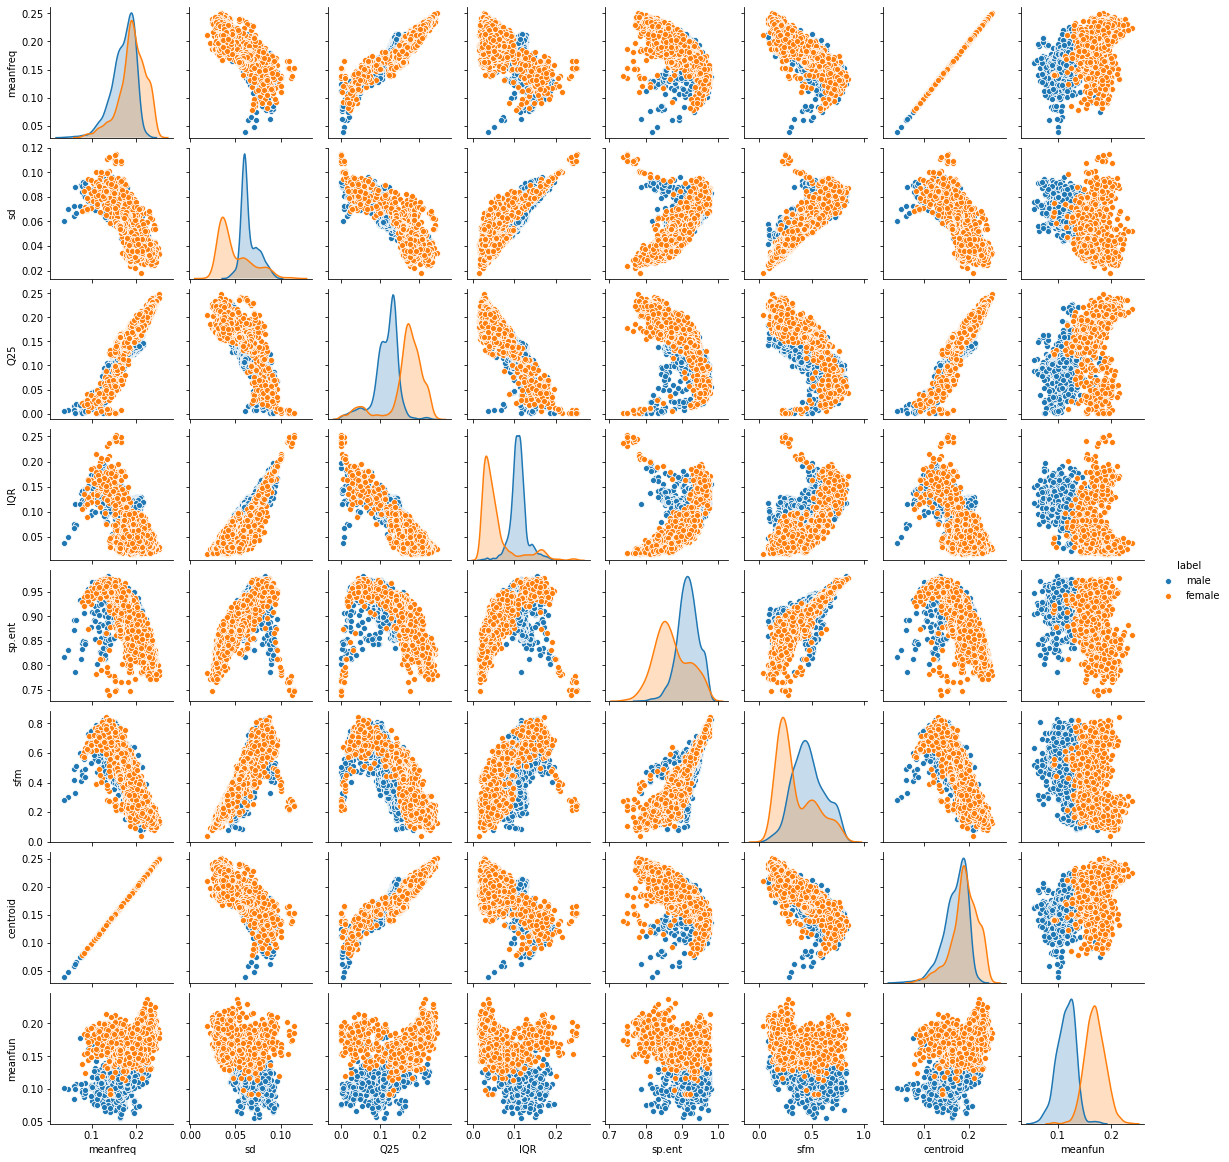

In [16]:
# pairplotting our data with gender as hue
sns.pairplot(data[['meanfreq', 'sd', 'Q25','IQR','sp.ent','sfm','centroid', 'meanfun','label']], 
                 hue='label', size=2)

# 3) Data Splitting

In [76]:
# splitting data & feature selection
from sklearn.model_selection import train_test_split
x = mydata.drop('label', axis=1)
y = mydata['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

# 4) Model Preselection

## 4.1) On Accuracy

Accuracy Mean & Std
LR: 0.870119 (0.048417)
LDA: 0.970217 (0.012982)
SVC: 0.667547 (0.036146)
DT: 0.963915 (0.010860)
RF: 0.979241 (0.009742)
KNN: 0.706798 (0.032861)
NB: 0.536358 (0.030062)
XGB: 0.977437 (0.009705)


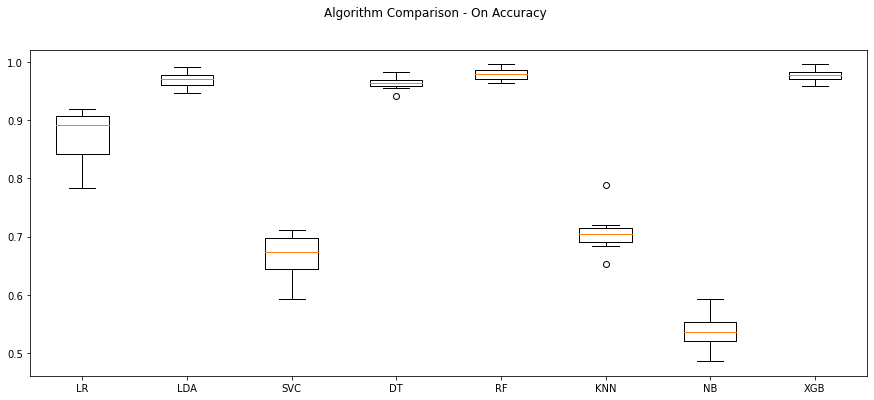

In [36]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.model_selection import GridSearchCV

# algorithms  to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', BernoulliNB()))
models.append(('XGB', XGBClassifier()))

# scoring
results = []
names = []
scoring = 'accuracy'

print("Accuracy Mean & Std")      
# cross-validate each model in turn
for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)       
            
# boxplot for algorithm comparison on accuracy
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison - On Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

    - In terms of Cross-Validation results on Accuracy, the top two model that performs the best are 
      RF (RandomForestClassifier) & XGB (XGBClassifier)

## 4.2) On Recall

Recall Mean & Std
LR: 0.917493 (0.072046)
LDA: 0.979665 (0.012806)
SVC: 0.719932 (0.035188)
DT: 0.959190 (0.017670)
RF: 0.975997 (0.013921)
KNN: 0.731636 (0.038260)
NB: 0.112976 (0.024963)
XGB: 0.975233 (0.011317)


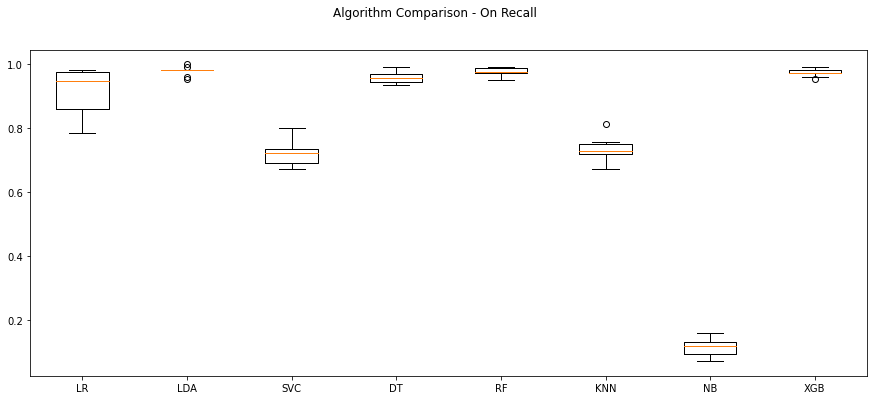

In [37]:
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', BernoulliNB()))
models.append(('XGB', XGBClassifier()))

# scoring
results = []
names = []
scoring = 'recall'

print("Recall Mean & Std") 
# cross-validate each model in turn
for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)       
            
# boxplot for algorithm comparison on recall
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison - On Recall')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

    - In terms of Cross-Validation results on Recall, the top two model that performs the best are 
      LDA (LinearDiscriminantAnalysis) & RF (RandomForestClassifier)  

#### 4.3) On ROC-AUC

ROC-AUC Mean & Std
LR: 0.906057 (0.029525)
LDA: 0.992752 (0.005785)
SVC: 0.689495 (0.038100)
DT: 0.964835 (0.008926)
RF: 0.997222 (0.002883)
KNN: 0.769690 (0.028674)
NB: 0.531669 (0.021336)
XGB: 0.996667 (0.002916)


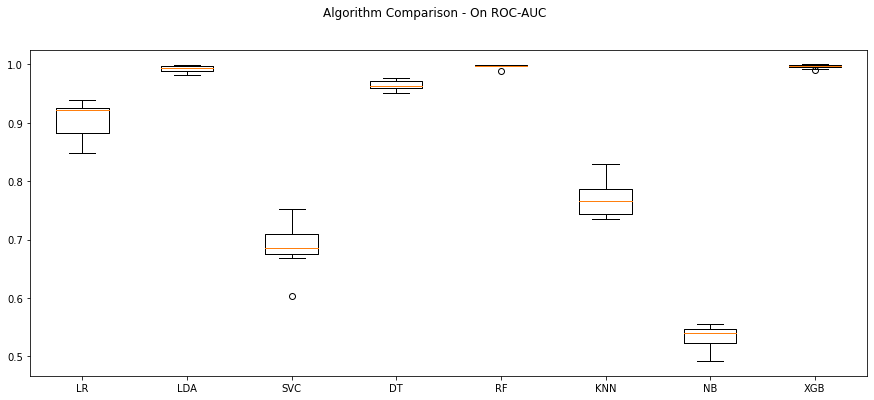

In [38]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', BernoulliNB()))
models.append(('XGB', XGBClassifier()))

# scoring
results = []
names = []

print("ROC-AUC Mean & Std") 
# cross-validate each model in turn 
for name, model in models:
    cv_results = cross_val_score(model, x_train, y_train, cv=10, n_jobs=-3, scoring= 'roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot for algorithm comparison on roc-auc scores
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison - On ROC-AUC')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


    - In terms of Cross-Validation results on ROC-AUC scores, the top two model that performs the best are 
      RF (RandomForestClassifier) & XGB (XGBClassifier)

# 5) Model Selection & Hyperparameter Tuning

From our previous observations, we have seen that RF (RandomForestClassifier) is, in overall, the best & most consistent model. Therefore, we will use this model for our next steps.

In [40]:
# model fitting
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=101)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [49]:
# classification report for train data
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
print("- train data:")
print(classification_report(y_train, rfc.predict(x_train)))

# classification report for test data
print("- test data:")
rfc_pred = rfc.predict(x_test)
rfc_predprob = rfc.predict_proba(x_test)
print(classification_report(y_test, rfc_pred))

- train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1121
           1       1.00      1.00      1.00      1096

    accuracy                           1.00      2217
   macro avg       1.00      1.00      1.00      2217
weighted avg       1.00      1.00      1.00      2217

- test data:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       463
           1       0.98      0.98      0.98       488

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



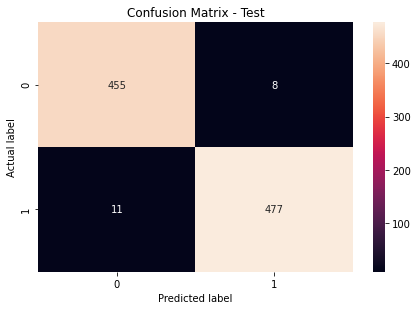

In [52]:
# confusion matrix for test data
cnf_matrix = confusion_matrix(y_test, rfc_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,  fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - Test')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


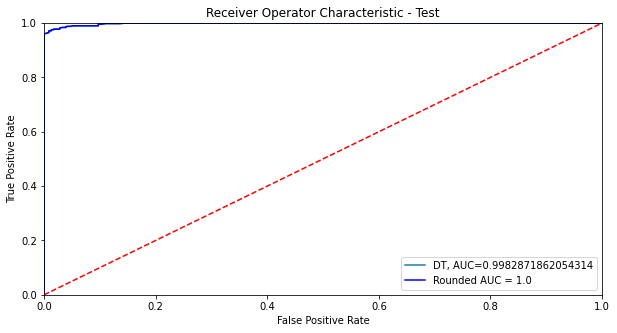

In [51]:
# ROC - AUC score for test data

from sklearn import metrics
rfc_pred_proba = rfc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  rfc_pred_proba)
auc = metrics.roc_auc_score(y_test, rfc_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize= (10,5))
plt.title('Receiver Operator Characteristic - Test')
plt.plot(fpr,tpr,label="DT, AUC="+str(auc))
plt.plot(fpr, tpr, 'b', label= 'Rounded AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [60]:
# hyperparameter tuning through GridSearchCV

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = rfc,
                    refit = 'accuracy',
                    param_grid = {
                        'n_estimators':[100,200,500,1000],
                        'bootstrap': [True,False],
                        'max_depth': [5,10,50,None],
                        'min_samples_split': [2,3,5],
                        }, 
                    scoring = 'accuracy',
                    cv = 4, n_jobs = -1)

# grid model fitting
grid.fit(x_train, y_train)

# best hyperparameters
grid.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'min_samples_split': 3,
 'n_estimators': 500}

In [61]:
# fitting the new hyperparameters
tuned = RandomForestClassifier(n_jobs=-2, random_state=101, bootstrap=False, max_depth=10,
                              min_samples_split=3, n_estimators=500)
tuned.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-2, oob_score=False, random_state=101, verbose=0,
                       warm_start=False)

In [62]:
# classification report for tuned train data
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
print("- train data:")
print(classification_report(y_train, tuned.predict(x_train)))

# classification report for tuned test data
print("- test data:")
tuned_pred = tuned.predict(x_test)
tuned_predprob = tuned.predict_proba(x_test)
print(classification_report(y_test, tuned_pred))

- train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1121
           1       1.00      1.00      1.00      1096

    accuracy                           1.00      2217
   macro avg       1.00      1.00      1.00      2217
weighted avg       1.00      1.00      1.00      2217

- test data:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       463
           1       0.98      0.98      0.98       488

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



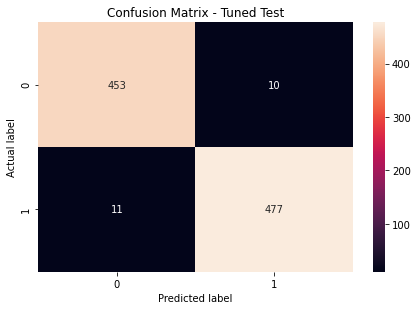

In [63]:
# confusion matrix for test data
cnf_matrix = confusion_matrix(y_test, tuned_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,  fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - Tuned Test')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


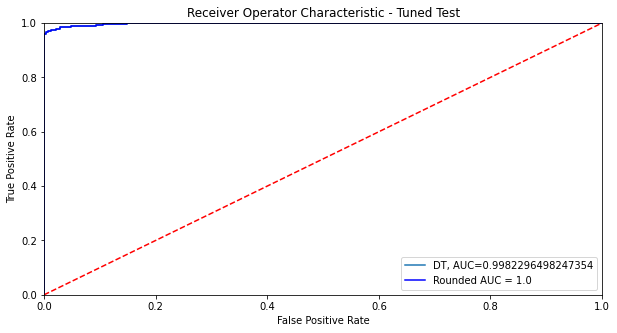

In [65]:
# ROC - AUC score for test data

from sklearn import metrics
tuned_pred_proba = tuned.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  tuned_pred_proba)
auc = metrics.roc_auc_score(y_test, tuned_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize= (10,5))
plt.title('Receiver Operator Characteristic - Tuned Test')
plt.plot(fpr,tpr,label="DT, AUC="+str(auc))
plt.plot(fpr, tpr, 'b', label= 'Rounded AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

- It seems that hyperparameter tuning doesnt do any good to our selected model of RF (RandomForestClassifier). But special note should be made on its present performance which is indeed very satisfying. With an Accuracy, Recall, Precision,  and F1 Score of 98, this is surely more than enough. Not to mention that this model has an AUC Score of 0.998, or in other words, this model has 99.8% probability to distinguish between classes. This is a model that is robust enough to be deployed for future purposes.


- Since it's established that our model is already more than enough, maybe even the best we could get, I would like to do some further tests to see if we can get more information out from this model.

# 6) Feature Evaluation

## 6.1) Feature Importance

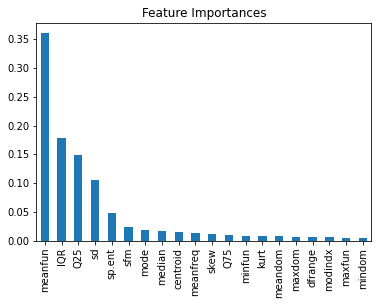

In [66]:
# feature importance of our selected model
rfc_coef = pd.Series(rfc.feature_importances_, x_train.columns).sort_values(ascending= False)
rfc_coef.plot(kind = 'bar', title='Feature Importances')
plt.show()

- From the feature importance, we can see which features that contribute to the most information gained. Those top features  are meanfun, IQR, Q25, sd, and sp.ent. In other words, in terms of information gained, all of these features are important for our model in predicting gender. Indeed, most of these are features that we've seen having stronger associations toward gender label than other features available.

## 6.2) Permutation Importance

In [67]:
# permutation importance for our selected model
from eli5 import show_weights
from eli5.sklearn import PermutationImportance
rfcperm = PermutationImportance(rfc, scoring = 'roc_auc', random_state= 101).fit(x_test, y_test)
show_weights(rfcperm, feature_names = list(x_test.columns))

Weight,Feature
0.1930 ± 0.0184,meanfun
0.0095 ± 0.0023,IQR
0.0053 ± 0.0030,Q25
0.0014 ± 0.0007,sp.ent
0.0009 ± 0.0004,sfm
0.0009 ± 0.0004,sd
0.0005 ± 0.0004,mode
0.0004 ± 0.0001,modindx
0.0003 ± 0.0002,maxdom
0.0003 ± 0.0002,dfrange


- From the permutation feature importance, we can see the green features that contribute the most to the drop of the overall model scores if the the feature's values are randomly shuffled. Those top features are meanfun, IQR, and Q25. In other words, in terms of random permutations on ROC-AUC score, all of these features are important for our model in predicting gender label. Indeed, all of these are features that we've seen having stronger associations toward gender label than other features available.


- Special note should be made for the meanfun feature for it has consistently proved itself as the most important feature, in all the tests & observations made, for determining the gender level in this voice dataset. This could be an important finding and should be noted for further experimentations. 

# 7) Learning Curve

train sizes: 
[1267 1583 1900 2217 2534]
train mean: 
[1. 1. 1. 1. 1.]
test mean: 
[0.5        0.93465945 0.96181022 0.96433587 0.96464734]


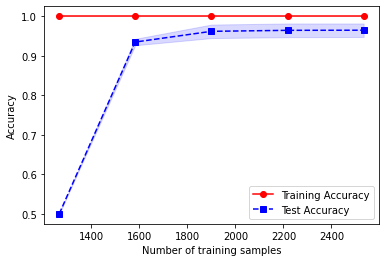

In [68]:
# importing the Learning Curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=rfc,
                                                       X=x,
                                                       y=y,
                                                       train_sizes=np.linspace(0.5, 1.0, 5),
                                                       cv=5)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
 
print('train sizes: ')
print(train_sizes)
print('train mean: ')
print(train_mean)
                                                        
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)


# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

print('test mean: ')
print(test_mean)


# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- From the learning curve we could see that the test accuracy increases with larger sample sizes. This may be an indication that the test accuracy could potentially increase further with a larger dataset. This coulde an interesting finding and should be noted for the further experimentations.

# 8) AutoML Analysis

In [79]:
# let's benchmark our model performance with TPOT AutoML
tpot = TPOTClassifier(subsample = 0.8, verbosity = 2, warm_start=True, early_stop=20, max_time_mins= 60, n_jobs= -2)

In [80]:
# fitting the TPOT AutoML to our data
tpot.fit(x_train, y_train)

Generation 1 - Current best internal CV score: 0.9780027054985279
Generation 2 - Current best internal CV score: 0.9780058884379725
Generation 3 - Current best internal CV score: 0.9780058884379725
Generation 4 - Current best internal CV score: 0.9780058884379725
Generation 5 - Current best internal CV score: 0.978570860189385
Generation 6 - Current best internal CV score: 0.978570860189385
Generation 7 - Current best internal CV score: 0.9785756345985519
Generation 8 - Current best internal CV score: 0.9802625925041776
Generation 9 - Current best internal CV score: 0.9802625925041776
Generation 10 - Current best internal CV score: 0.9802625925041776
Generation 11 - Current best internal CV score: 0.9819559162886927
Generation 12 - Current best internal CV score: 0.9819559162886927
Generation 13 - Current best internal CV score: 0.9819559162886927
Generation 14 - Current best internal CV score: 0.981957507758415
Generation 15 - Current best internal CV score: 0.981957507758415
Generati

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=20, generations=100,
               max_eval_time_mins=5, max_time_mins=60, memory=None,
               mutation_rate=0.9, n_jobs=-2, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring=None, subsample=0.8, template=None,
               use_dask=False, verbosity=2, warm_start=True)

In [81]:
# exporting our model results
tpot.export('tpot_VOICE_GENDER.py')

In [82]:
# using our AutoML model ('tpot_VOICE_GENDER.py') to our data
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MaxAbsScaler
from sklearn.tree import DecisionTreeClassifier
from tpot.builtins import StackingEstimator
from xgboost import XGBClassifier

# Average CV score on the training set was: 0.9825224795098274
automl = make_pipeline(
    StackingEstimator(estimator=DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=12, min_samples_split=17)),
    StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.5, max_depth=5, max_features=0.8, min_samples_leaf=17, min_samples_split=16, n_estimators=100, subsample=0.9500000000000001)),
    StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.001, max_depth=1, max_features=1.0, min_samples_leaf=2, min_samples_split=4, n_estimators=100, subsample=0.45)),
    StackingEstimator(estimator=XGBClassifier(learning_rate=0.1, max_depth=8, min_child_weight=12, n_estimators=100, nthread=1, subsample=0.9000000000000001)),
    MaxAbsScaler(),
    ExtraTreesClassifier(bootstrap=True, criterion="gini", max_features=0.7000000000000001, min_samples_leaf=18, min_samples_split=2, n_estimators=100))

automl.fit(x_train, y_train)
automl_pred = automl.predict(x_test)


In [83]:
# classification report for AutoML

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, automl_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       463
           1       0.98      0.97      0.97       488

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



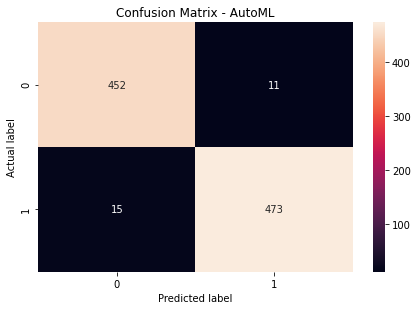

In [86]:
# confusion matrix for AutoML
cnf_matrix = confusion_matrix(y_test, automl_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,  fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix - AutoML')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


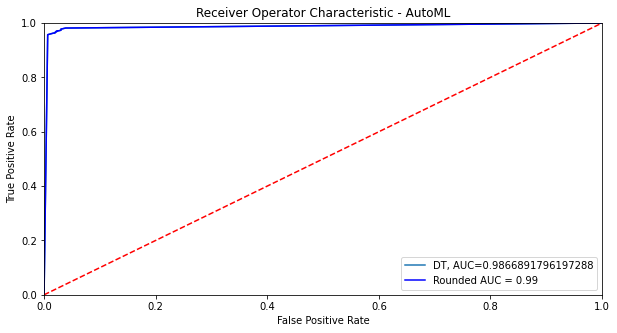

In [84]:
# ROC - AUC Score for AutoML
automl_pred_proba = automl.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  automl_pred_proba)
auc = metrics.roc_auc_score(y_test, automl_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize= (10,5))
plt.title('Receiver Operator Characteristic - AutoML')
plt.plot(fpr,tpr,label="DT, AUC="+str(auc))
plt.plot(fpr, tpr, 'b', label= 'Rounded AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

From the observations:
- If we compare the results that we get from AutoML & our own model, we could see that the latter performs better. Our own model performs higher not only in accuracy & recall scores but also in ROC-AUC Scores. This may be the case because our process for AutoML analysis is limited to only 60 mins (1 hour). It may be recommended for future experimentations to increase its analysis time. 
- We could see that at the moment, our model, RF (RandomForestClassifier), is better for overall prediction. Therefore, it is recommended for further usage.

In [37]:
# model saved for further usage (model deployment)
import pickle
filename = 'voice_gender.sav';
pickle.dump(rfc, open(filename, 'wb'))

# 9) Concluding Notes

#### 1) On features:
Through all the tests & observations, there are three most frequent features that keeps showing up and they are meanfun, IQR, and Q25 features with meanfun as the most fundamental feature. These feature(s) could be the feature(s) that has better association towards our target variable (gender label) and may prove to be important for further tests & observations.

#### 2) On predictions:
In overall, the best model for our prediction is RF (RandomForestClassifier). It even gives better results than the AutoML model in all of its metrics, therefore, recommended for further usage.

#### 3) On samples:
There's an indication that the model predictions could improve with larger datasets. It's recommended for further tests & observations to have larger datasets.

## ---------------------------------------------------- THANK YOU --------------------------------------------------------------